# Devoir maison sur les trains de tenseurs

Le devoir-maison comporte 2 exercices indépendants.

## Exercice 1 : SVD hiérarchique et influence de l’ordre

Soit $C \in \mathbb{R}^{n_1 \times \cdots \times n_L}$, une représentation en trains de tenseurs (TT) $(A_1,\dots,A_L)$ avec $A_k \in \mathbb{R}^{n_k \times r_{k-1} \times r_k}$, $r_0 = r_L = 1$ et telle que pour tout $1 \leq i_1 \leq n_1, \dots, 1 \leq i_L \leq n_L$, on a 
\begin{equation}
  C_{i_1 \dots i_L} = A_1[i_1] \cdots A_L[i_L].
\end{equation}

Une représentation exacte en TT peut être obtenue via la SVD hiérarchique présentée en cours. Pour comparer l’influence de l’ordre nous allons nous intéresser à l’exemple de l’état de Bell $B \in \bigotimes_{i=1}^L \R^{2L}$
\begin{align*}
  B_{i_1\dots i_{2L}} &= \big(\delta_{1,i_1} \delta_{2,i_2} + \delta_{2,i_1} \delta_{1,i_2}\big) \big(\delta_{1,i_3} \delta_{2,i_4} + \delta_{2,i_3} \delta_{1,i_4}\big) \cdots \big(\delta_{1,i_{2L-1}} \delta_{2,i_{2L}} + \delta_{2,i_{2L-1}} \delta_{1,i_{2L}}\big), \\
  & = \prod_{k=1}^L (\delta_{1,i_{2k-1}}\delta_{2,i_{2k}} + \delta_{2,i_{2k-1}}\delta_{1,i_{2k}}),
\end{align*}
et à sa version avec les indices permutés $\widetilde{B} \in \bigotimes_{i=1}^L \R^{2L}$
\begin{align*}
  \widetilde{B}_{i_1\dots i_{2L}} =  \prod_{k=1}^L \big(\delta_{1,i_{k}} \delta_{2,i_{k+L}} + \delta_{2,i_k} \delta_{1,i_{k+L}}\big).
\end{align*}


**Quelques fonctions Python pour les tableaux multidimensionnels**

Soit `t` un tableau de taille $n_1 \times \dots \times n_L$.

- créer un tableau de zéros : `np.zeros(n)` où `n` est un tableau d’entiers positifs
- taille d’un tableau : si `t` est un tableau de taille $n_1 \times \dots \times n_L$ `np.shape(t)` renvoie un tableau `(n_1,...,n_L)`
- nombre d’éléments d’un tableau : `np.size(t)` renvoie $\prod_{i=1}^L n_i$ 
- reshape : `np.reshape(t,r)` renvoie un tableau de taille $r=(r_1,\dots,r_d)$ si c’est possible
- contraction de tenseurs : la fonction `np.einsum` permet de faire toute sorte d’opérations sur les tenseurs. Quelques exemples pour illustrer :
  - `np.einsum('abcd,ecdf',A,B)` renvoie le tenseur $C_{abef} = \sum_{c,d} A_{abcd} B_{ecdf}$
  - l’ordre alphabétique des indices importe : `np.einsum('ebcf,acdb',A,B)` renvoie le tenseur $C_{abef} = \sum_{c,d} A_{ebcf} B_{acdb}$
  - `np.einsum('...d,df',A,B)` renvoie le tenseur $C_{If} = \sum_{d} A_{Id} B_d$ où I est possiblement un multi-indice.


In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

"""
Retourne B comme un vecteur de taille 2^(2L)
"""
def bell_vec(L):
  if L==1:
    b = np.zeros((2,2))
    b[0,1], b[1,0] = 1.0, 1.0
    return np.reshape(b,4)
  else:
    b = np.zeros((2,2))
    b[0,1], b[1,0] = 1.0, 1.0
    return np.kron(np.reshape(b,4),bell_vec(L-1))

def bell_state(L):
  return np.reshape(bell_vec(L),2*np.ones(2*L,dtype=int)) 

def reordered_bell(L):
  b = bell_state(L)
  for i in range(L//2):
    b = np.swapaxes(b,2*i+1,2*i+L+1)
  return b

**Q1)** Montrer que $B$ a une représentation en train de tenseurs de rang 2.  

**Q2)** Montrer que l’état de Bell réordonné n’admet pas de représentation exacte de rang strictement inférieure à $2^L$.

**Q3)** Implémenter une fonction `tt_to_tensor(A)` qui prend en entrée une liste des coeurs $(A_1,\dots,A_L)$ et qui retourne le tenseur $C$ donné par 
$$
  \forall \, 1 \leq i_1 \leq n_1, \dots, 1 \leq i_L \leq n_L, \ C_{i_1 \dots i_L} = A_1[i_1] \cdots A_L[i_L].
$$
On supposera que $A_k \in \mathbb{R}^{n_k \times r_{k-1} \times r_k}$ (la première dimension du tableau $A_k$ est $n_k$). On pourra utiliser la fonction `numpy.tensordot` ou `numpy.einsum`.

In [2]:
def tt_to_tensor(A):
  return C

**Q4)** Implémenter l’algorithme SVD hiérarchique `hsvd(C)` qui renvoie la liste des coeurs $(A_1,\dots,A_L)$ de dimension $A_k \in \mathbb{R}^{n_k \times r_{k-1} \times r_k}$ et la liste des rangs TT $r=(r_1,\dots,r_{L-1})$.
Pour cela, on pourra utiliser la fonction `numpy.linalg.svd(M,full_matrices=False)` qui renvoie un triplet `(u,s,vt)` tel que `M = u@np.diag(s)@vt`.

In [3]:
def hsvd(C):

  return A, r

**Q5)** Vérifier sur l’état de Bell que `hsvd(B)` renvoie bien une décomposition TT du tenseur $B$.

In [4]:
tt, r = hsvd(bell_state(2))
C = tt_to_tensor(tt)
LA.norm(C-bell_state(2))

3.1401849173675503e-16

**Q6)** Vérifier pour $L=8$ que l’état de Bell $B$ a un rang TT égal à 2 et que l’état de Bell réordonné $\widetilde{B}$ a un rang TT égal à 256.

In [5]:
tt_B, r_B = hsvd(bell_state(8))
print("Rang TT de B = "+str(np.max(r_B)))

Rang TT de B = 2


In [6]:
tt_tB, r_tB = hsvd(reordered_bell(8))
print("Rang TT de B = "+str(np.max(r_tB)))

Rang TT de B = 256


## Exercice 2 : HSVD pour des trains de tenseurs

Le but de cet exercice est de comprendre comment adapter l’algorithme HSVD pour des tenseurs donnés sous forme de trains de tenseurs à compresser. 
Pour rappel, pour un tenseur $C\in \mathbb{R}^{n_1 \times \cdots \times n_L}$, la HSVD tronquée est donnée par 
\begin{align*}
    C_{i_1 \dots i_L} &= \ C_{i_1}^{i_2\dots i_L} & (\text{reshape of } C \text{ to } n_1 \times n_2 \cdots n_L)\\
    &= \big( U_1 \big)_{i_1}^{\alpha_1} \big( \Sigma_1 V_1 \big)_{\alpha_1}^{i_2\dots i_L} & (\text{ SVD}) \\
    &= \big( U_1 \big)_{i_1}^{\alpha_1} \big( \Sigma_1 V_1 \big)_{\alpha_1 i_2}^{i_3\dots i_L} & (\text{reshape of } \Sigma_1 V_1) \\
    &= \big( U_1 \big)_{i_1}^{\alpha_1} \big( U_2 \big)_{\alpha_1 i_2}^{\alpha_2} \big( \Sigma_2 V_2 \big)_{\alpha_2}^{i_3\dots i_L} & (\text{ SVD of } \Sigma_1 V_1) \\
    &= \big( U_1 \big)_{i_1}^{\alpha_1} \big( U_2 \big)_{\alpha_1 i_2}^{\alpha_2} \big(\Sigma_2 V_2 \big)_{\alpha_2 i_3}^{i_4\dots i_L} & (\text{reshape of } \Sigma_2 V_2),
\end{align*}


Ainsi, l’algorithme HSVD appliqué à un tenseurs $C \in \mathbb{R}^{n_1 \times \cdots \times n_L}$ requiert des SVD des reshapes du tenseur $C$ (ou de tenseurs de taille similaire). D’un point de vue du stockage mais aussi du coût de calculs (on supposera que le coût de calculs d’une SVD d’une matrice de taille $m \times n$ est de l’ordre de $m^2 n + n^2 m$), la HSVD n’est pas un algorithme pratique, car son coût est exponentiel en $L$.

Soit $C\in \mathbb{R}^{n_1 \times \cdots \times n_L}$ un tenseur admettant une décomposition en train de tenseurs $(A_1,\dots,A_L)$ orthogonale à droite, c’est-à-dire que pour tout $1 \leq k \leq L$
$$
  \sum\limits_{i_k=1}^{n_k} A_k[i_k] A_k[i_k]^T = \mathrm{id}_{r_{k-1}}.
$$

**Q1)** Soit $B = AQ$ telle que $Q$ est orthogonale. Déduire une SVD de $B$ à partir de celle de $A$.

**Q2)** Montrer que 
$$
  C_{i_1}^{i_2\dots i_L} = \begin{bmatrix}
    A_1[1] \\
    \vdots \\
    A_1[n_1]
  \end{bmatrix} \begin{bmatrix}
    A_2[1] \cdots A_L[1] \quad
    \cdots \quad
    A_2[n_2] \cdots A_L[n_L]
  \end{bmatrix}.
$$
Déduire la SVD de $(C_{i_1}^{i_2\dots i_L}) \in \mathbb{R}^{n_1 \times n_2 \cdots n_L}$ de celle de $\begin{bmatrix}
    A_1[1] \\
    \vdots \\
    A_1[n_1]
  \end{bmatrix} = U_1 \Sigma_1 V_1^T$.

**Q3)** Montrer que l’algorithme suivant est identique à la HSVD du cours pour un tenseur $C$ donné comme un train de tenseurs $(A_1,\dots,A_L)$, où $A_k$ est orthogonal à droite pour $k=2,\dots,L$.
Montrer que son coût est de l’ordre de $r^3$ où $r = \max_{1 \leq k \leq L-1}(r_k)$.

```
function hsvd_tt(A) \\ A = (A_1,..,A_L) with A_k of size n_k x r_{k-1} x r_k
  for k=1,..,L-1
    Ak_temp = reshape(A_k, (n_k*r_{k-1},r_k))
    u,s,vt = SVD(Ak_temp)
    r_k = length(s)
    A_k = reshape(u,(n_k,r_{k-1},r_k))
    for i_{k+1}=1,...,n_{k+1}
      A_{k+1}[i_{k+1}] = s*vt*A_{k+1}[i_{k+1}]
    end for
  end for
  return (A_1,..,A_L)
```

**Q4)** Implémenter l’algorithme `hsvd_tt(x_tt)` qui renvoie un train de tenseurs `y_tt` et son rang `(r_1,...,r_{L-1})` donné par l’algorithme de la question 3. `x_tt` n'est pas supposé sous forme orthogonale à droite et on pourra utiliser directement la fonction `tt_orthogonalise` pour l'orthogonaliser.

In [30]:
"""
  tt_orthogonalise : 
    input : x_tt = (x_1,...,x_L), x_k of size n_k x r_{k-1}^x x r_k^x
    output : identical tensor with TT representation y_tt = (y_1,...,y_L), y_k right-orthogonal for 1 <= k <= L-1
"""
def tt_orthogonalise(x_tt):
  L = len(x_tt)
  y_tt = []
  for i in range(L):
    y_tt.append(np.copy(x_tt[i]))
  for k in range(L-1,0,-1):
    nk,rkm,rk = y_tt[k].shape
    yk_temp = np.vstack([np.transpose(y_tt[k][i,:,:]) for i in range(nk)])
    q,r = LA.qr(yk_temp)
    rkm = q.shape[1]
    y_tt[k] = np.reshape(np.transpose(q),(rkm,nk,rk))
    y_tt[k] = np.swapaxes(y_tt[k],0,1)
    nkm,rkm2,rkm = y_tt[k-1].shape
    yk_temp = np.reshape(y_tt[k-1],(nkm*rkm2,rkm))@np.transpose(r)
    rkm = q.shape[1]
    y_tt[k-1] = np.reshape(yk_temp,(nkm,rkm2,rkm))
  return y_tt


"""
rand_tt
  input : 
    - n = (n_1,...,n_L) size of the tensor
    - r = (1,r_1,...,r_{L-1},1) TT rank of the random TT
  output :
    - x_tt : random TT with input TT rank
"""

def rand_tt(n,r):
  x_tt = []
  L = len(n)
  for k in range(L):
    xk_temp = np.random.randn(n[k],r[k],r[k+1])
    x_tt.append(xk_temp/np.sqrt(n[k]*r[k]))
  return x_tt

""" 
tt_add(x_tt,y_tt): 
  input 
    - x_tt = (x_1,...,x_L), x_k of size n_k x r_{k-1}^x x r_k^x
    - y_tt = (y_1,...,y_L), y_k of size n_k x r_{k-1}^y x r_k^y
  output
    - TT representation of the sum of the tensors x_tt+y_tt : z_tt = (z_1,...,z_L), z_k of size n_k x r_{k-1}^z x r_k^z
"""
def tt_add(x_tt,y_tt):
  z_tt = []
  L = len(x_tt)
  z1 = np.zeros((x_tt[0].shape[0],1,x_tt[0].shape[2]+y_tt[0].shape[2]))
  for i in range(x_tt[0].shape[0]):
    z1[i,:,:] = np.hstack([x_tt[0][i,:,:], y_tt[0][i,:,:]])
  z_tt.append(z1)
  for k in range(1,L-1):
    zk = np.zeros((x_tt[k].shape[0],x_tt[k].shape[1]+y_tt[k].shape[1],x_tt[k].shape[2]+y_tt[k].shape[2]))
    for i in range(x_tt[k].shape[0]):
      zk[i,:,:] = np.block([[x_tt[k][i,:,:], np.zeros((x_tt[k].shape[1],y_tt[k].shape[2]))], [np.zeros((y_tt[k].shape[1],x_tt[k].shape[2])), y_tt[k][i,:,:]]])
    z_tt.append(zk)
  zL = np.zeros((x_tt[-1].shape[0],x_tt[-1].shape[1]+y_tt[-1].shape[1],1))
  for i in range(x_tt[-1].shape[0]):
    zL[i,:,:] = np.vstack([x_tt[-1][i,:,:], y_tt[-1][i,:,:]])
  z_tt.append(zL)
  return z_tt

n = (4,4,4,4,4,4,4,4)
r = (1,4,4**2,4**3,4**4,4**3,4**2,4,1)
x_tt = rand_tt(n,r)
y_tt = rand_tt(n,r)
z_tt = tt_add(x_tt,y_tt)
x = tt_to_tensor(x_tt)
tdx = tt_to_tensor(tt_orthogonalise(x_tt))
y = tt_to_tensor(y_tt)
z = tt_to_tensor(z_tt)
print("Test tt_orthogonalise: "+str(LA.norm(tdx-x)))
print("Test tt_add: " +str(LA.norm(x+y-z))) #doit retourner 0 à précision machine près



Test tt_orthogonalise: 2.7241194432830106e-15
Test tt_add: 3.206630601313102e-16


**Q5)** Vérifier que l’algorithme fonctionne sur l’exemple suivant.



In [31]:
tdz_tt,r_tdz = tt_rounding(z_tt)
tdz = tt_to_tensor(tdz_tt)
print(LA.norm(z-tdz)/LA.norm(z))

5.113158014382486e-15


**Q6)** Modifier l’algorithme `hsvd_tt(x_tt,eps)` afin d’ajouter une troncature de la SVD à un niveau `eps` à chaque SVD. On pourra utiliser la fonction `truncation` pour tronquer les valeurs singulières en norme 2.

In [36]:

def truncation(s,eps):
  err2 = 0.0
  i=len(s)
  while err2 < eps**2 and i>=0:
    err2 += s[i-1]**2
    i-=1
  return i+1

**Q7)** Tracer la norme du tenseur $z-z_\varepsilon$ où $z = x+y$ avec $x$ et $y$ des TT générés aléatoirement par `tt_randn` et $z_\varepsilon$ le tenseur donné par `z_eps = tt_rounding(tt_add(x_tt,y_tt),eps)` pour `eps in [1e-1,3e-2,1e-2,3e-3,1e-3,3e-3,1e-4]`. Commenter la courbe obtenue.


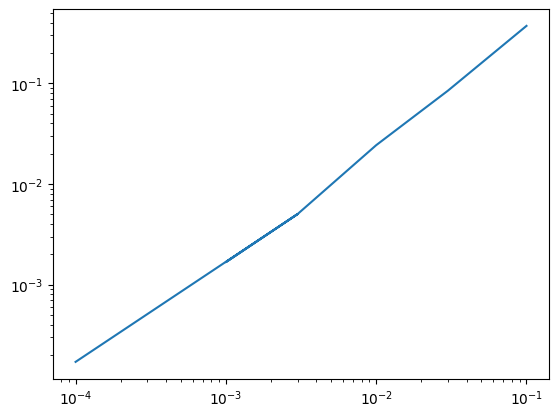

In [37]:
eps_list = [1e-1,3e-2,1e-2,3e-3,1e-3,3e-3,1e-4]
trunc_err = []
for eps in eps_list:
  ztt_eps,r = tt_rounding(z_tt,eps)
  z_eps = tt_to_tensor(ztt_eps)
  trunc_err.append(LA.norm(z-z_eps))

plt.figure()
plt.loglog(eps_list,trunc_err)